In [15]:
pwd

'C:\\Users\\msrib\\Documents\\Stat Learning\\Final project'

In [1]:
!pip install pyppeteer

     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/50.1 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 50.1/50.1 kB 642.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/84.9 kB ? eta -:--:--
     ---------------------------------------- 84.9/84.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/82.9 kB ? eta -:--:--
   ---------------------------------------- 82.9/82.9 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/144.2 kB ? eta -:--:--
   ---------------------------------------  143.4/144.2 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 144.2/144.2 kB 4.3 MB/s eta 0:00:00
  Created wheel for websockets: filename=websockets-10.4-cp312-cp312-win_amd64.whl size=95035 sha256=6de05d1c93f4b85658d5acc1c898018452

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('Energy_consumption.csv')
print(f"Shape of the Dataset :{df.shape}")
display(df.head(5))


Shape of the Dataset :(1000, 11)


Timestamp  Temperature   Humidity  SquareFootage  Occupancy HVACUsage  \
0  1/1/2022 0:00    25.139433  43.431581    1565.693999          5        On   
1  1/1/2022 1:00    27.731651  54.225919    1411.064918          1        On   
2  1/1/2022 2:00    28.704277  58.907658    1755.715009          2       Off   
3  1/1/2022 3:00    20.080469  50.371637    1452.316318          1       Off   
4  1/1/2022 4:00    23.097359  51.401421    1094.130359          9        On   

  LightingUsage  RenewableEnergy  DayOfWeek Holiday  EnergyConsumption  
0           Off         2.774699     Monday      No          75.364373  
1            On        21.831384   Saturday      No          83.401855  
2           Off         6.764672     Sunday      No          78.270888  
3            On         8.623447  Wednesday      No          56.519850  
4           Off         3.071969     Friday      No          70.811732

In [24]:
df.describe()

Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015974    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120

In [25]:
#print(df.dtypes)
#df['Timestamp'] = pd.to_datetime(df['Timestamp'],errors='coerce')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%m/%d/%Y %H:%M")
df = df.dropna(subset=['Timestamp'])
#Set an upper limit for valid dates
upper_limit = pd.Timestamp('2024-02-01')
lower_limit = pd.Timestamp('2021-01-01')
#Cap the dates
df['Timestamp'] = df['Timestamp'].clip(upper=upper_limit, lower=lower_limit)

min_value=df['Timestamp'].min()
max_value=df['Timestamp'].max()
# Check if the conversion was successful
print(f"Data type of Timestamp column: {df['Timestamp'].dtype}")
print(f"Number of NaT values: {df['Timestamp'].isna().sum()}")
print(f"Time Interval: {min_value} to {max_value}")
print(df.dtypes)

Data type of Timestamp column: datetime64[ns]
Number of NaT values: 0
Time Interval: 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Timestamp            datetime64[ns]
Temperature                 float64
Humidity                    float64
SquareFootage               float64
Occupancy                     int64
HVACUsage                    object
LightingUsage                object
RenewableEnergy             float64
DayOfWeek                    object
Holiday                      object
EnergyConsumption           float64
dtype: object


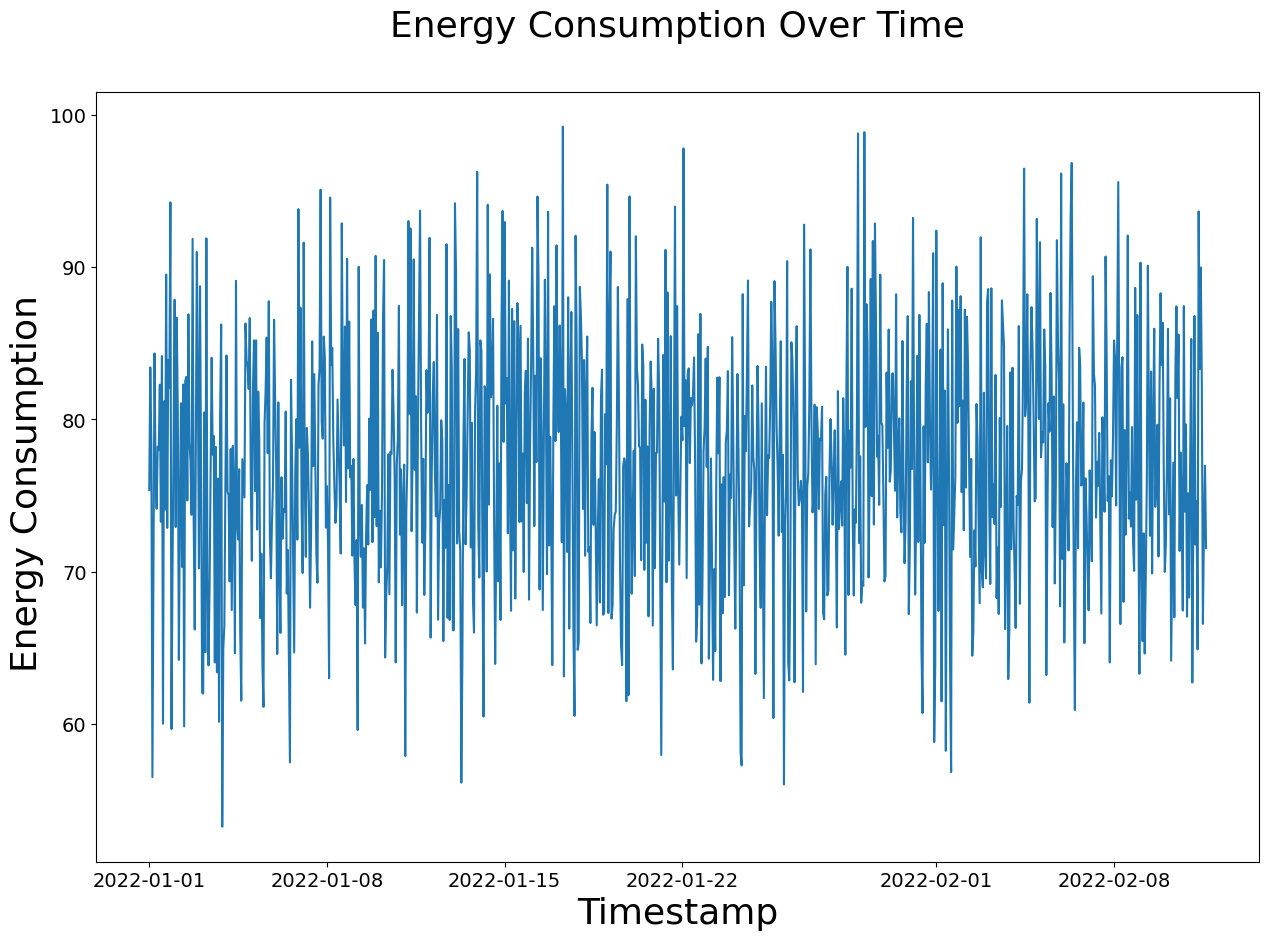

In [26]:
# Set the timestamp as the index
#df.set_index('Timestamp', inplace=True)
# Plotting function
import matplotlib.pyplot as plt
def plot_time_series(df, column, title):
    plt.figure(figsize=(15, 10))
    plt.plot(df['Timestamp'], df[column])
    plt.title('Energy Consumption Over Time', fontsize=26 , pad =40)
    plt.xlabel('Timestamp', fontsize=26)
    plt.ylabel('Energy Consumption ', fontsize=26)
    # Rotate x-axis labels to avoid overlap and make them more readable
    plt.xticks( fontsize=14)
    # Adjust y-axis font size
    plt.yticks(fontsize=14)

    plt.savefig('Energy Consumption Over Time.png', dpi=300, bbox_inches='tight')
    plt.show()
    # Plot  data
plot_time_series(df, 'EnergyConsumption', 'Energy Consumption Over Time')

Text(0, 0.5, 'Load usage')

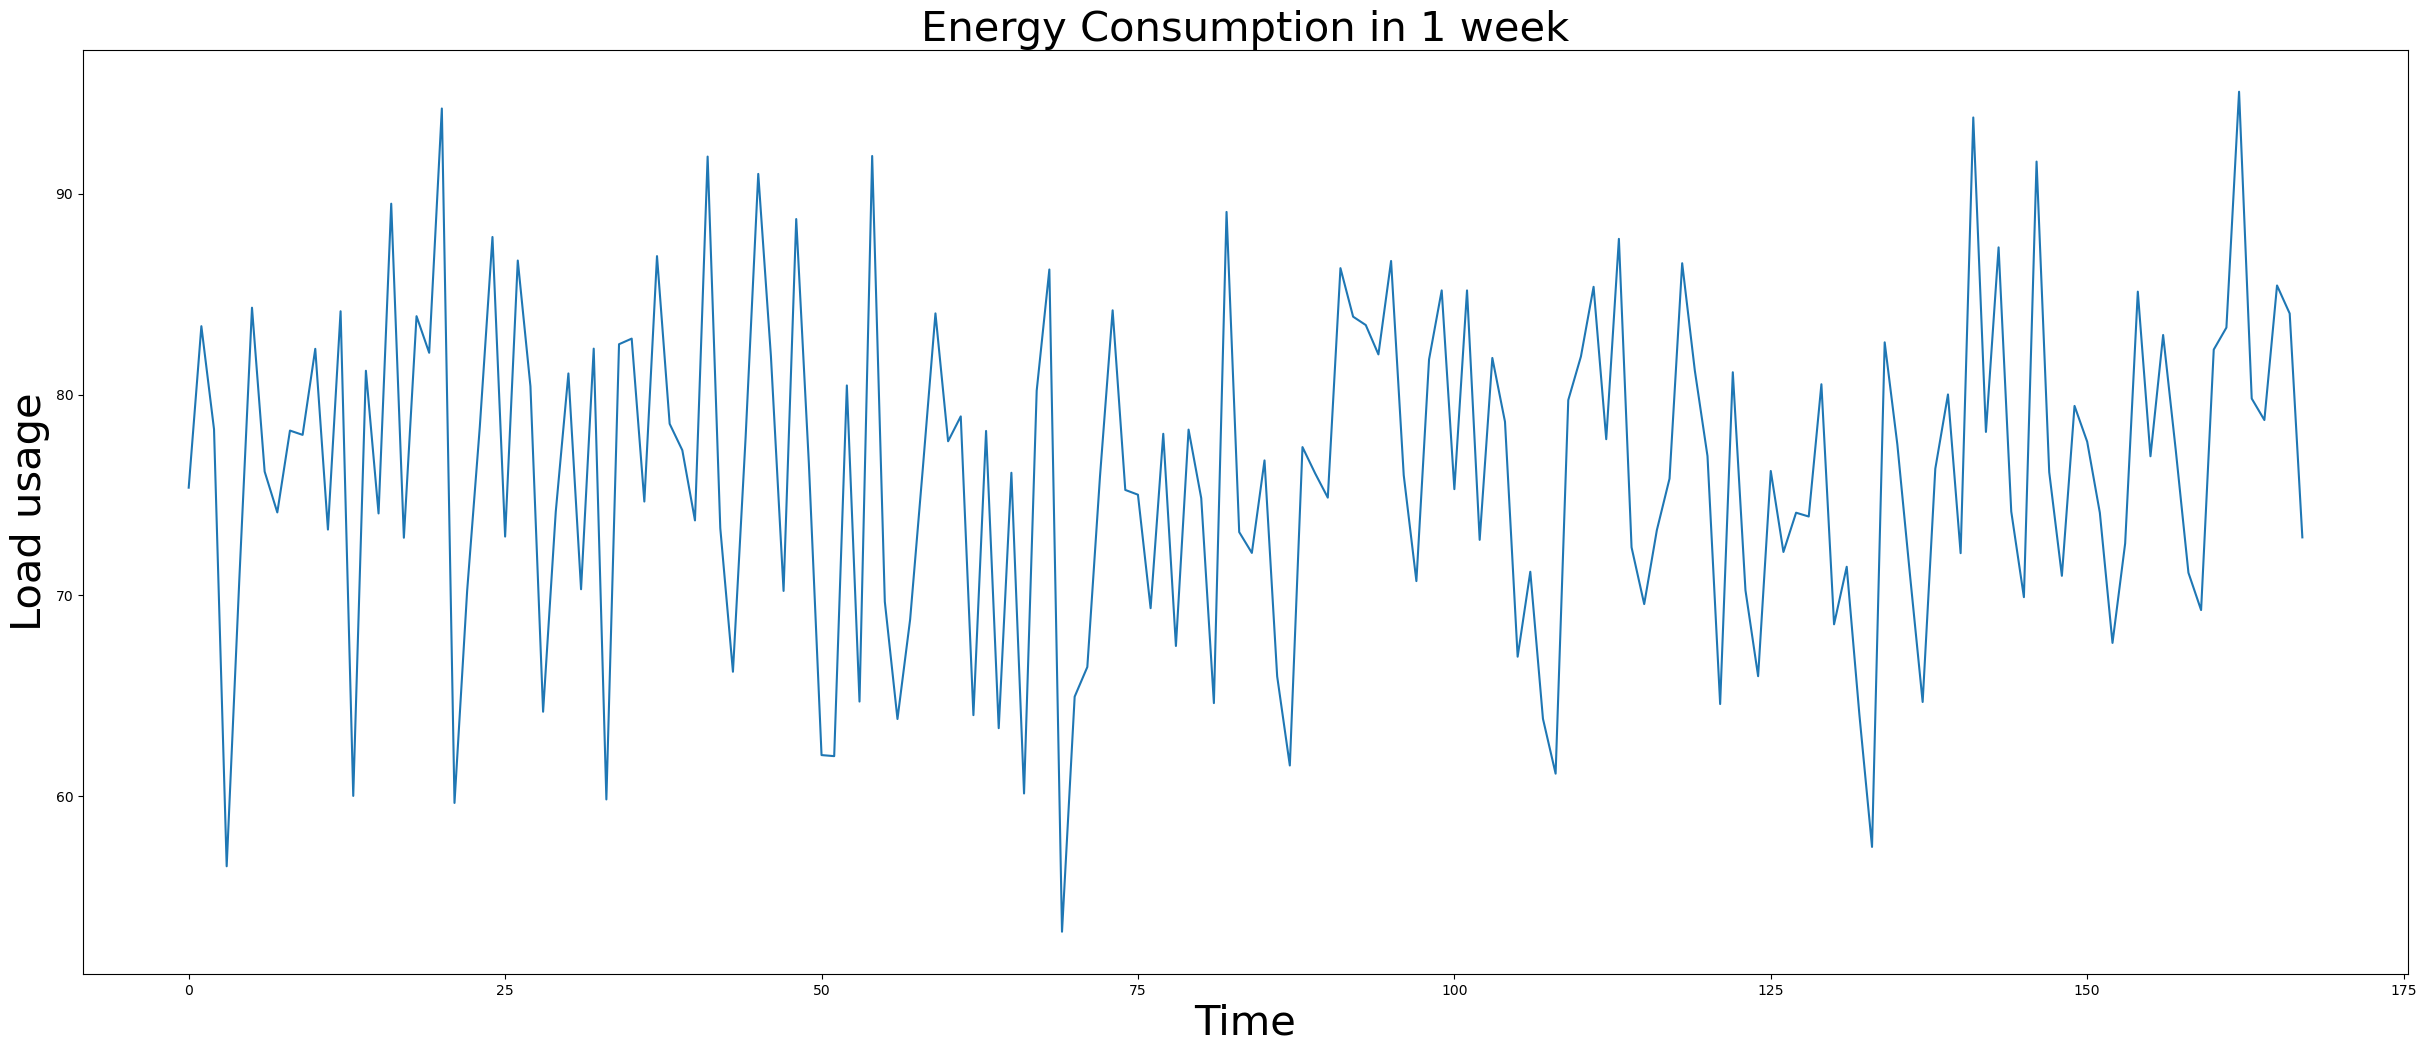

In [27]:
#Data Visualization for the energy consumption 1 week in Jan 2023
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 12))
ax.set_title("Energy Consumption in 1 week",fontsize=30)
ax.set_xlabel('Time', fontsize=30)
start=0
end=24*7
ax.plot(df['EnergyConsumption'][start:end])
ax.set_ylabel("Load usage", fontsize=30)

In [28]:
# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Identify distinct-value columns (e.g., fewer than 10 unique values in numerical columns)
distinct_value_columns = [col for col in df.columns if df[col].nunique() <=10 and df[col].dtype != 'object']

# Step 3: Identify continuous columns
continuous_columns = [col for col in df.select_dtypes(include=['number']).columns 
                      if col not in distinct_value_columns]

# Combine categorical columns with distinct-value columns
new_categorical_columns = categorical_columns + distinct_value_columns

# Step 4: Print each group of columns
print("Categorical columns:", categorical_columns)
print("Distinct-value columns:", distinct_value_columns)
print("New set of categorical columns (categorical + distinct-value):", new_categorical_columns)
print("Continuous columns:", continuous_columns)

Categorical columns: ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
Distinct-value columns: ['Occupancy']
New set of categorical columns (categorical + distinct-value): ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday', 'Occupancy']
Continuous columns: ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']


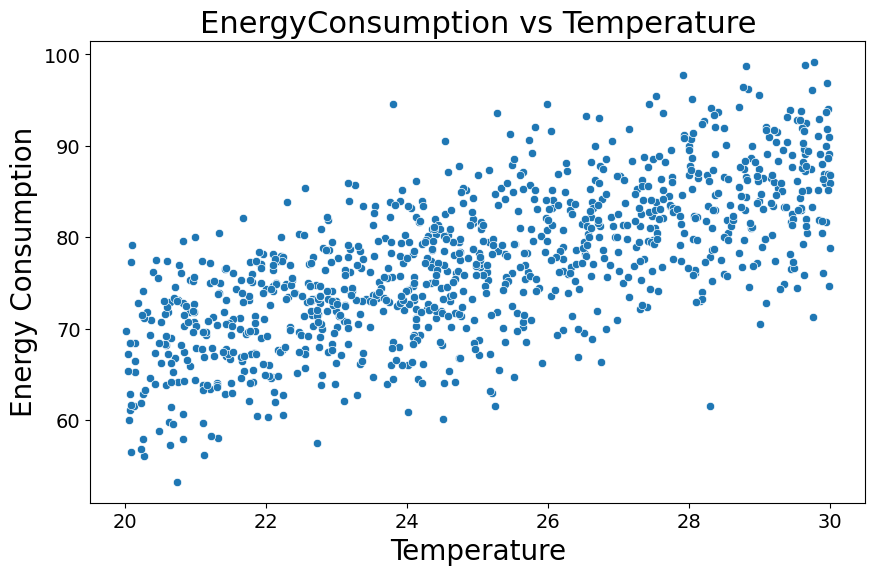

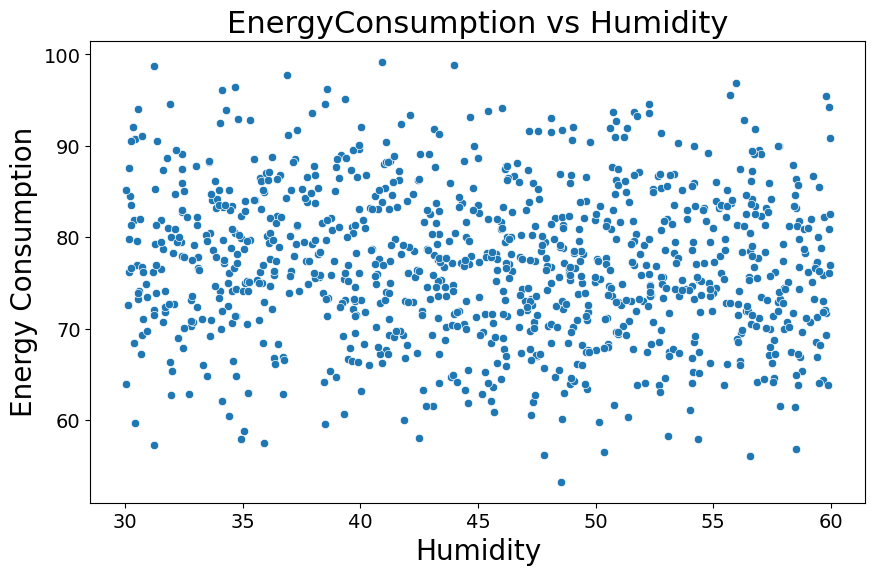

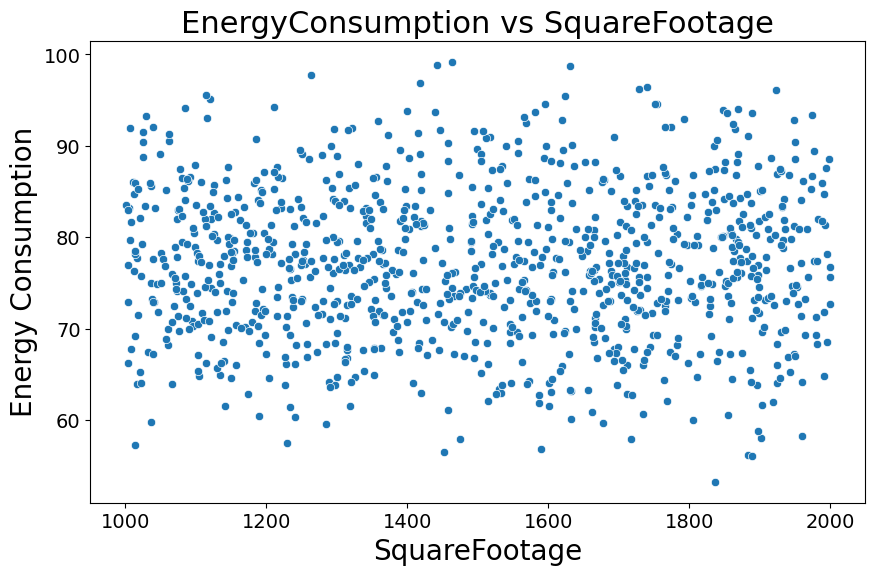

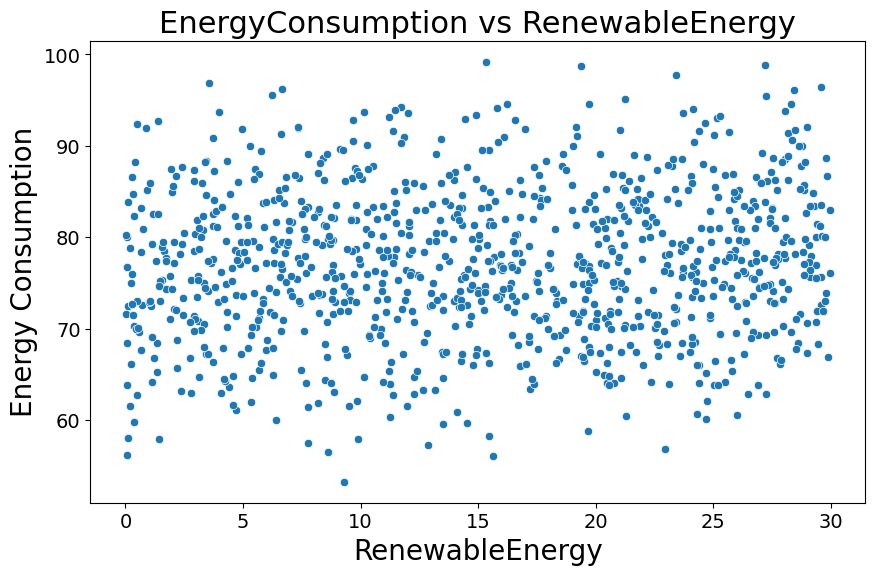

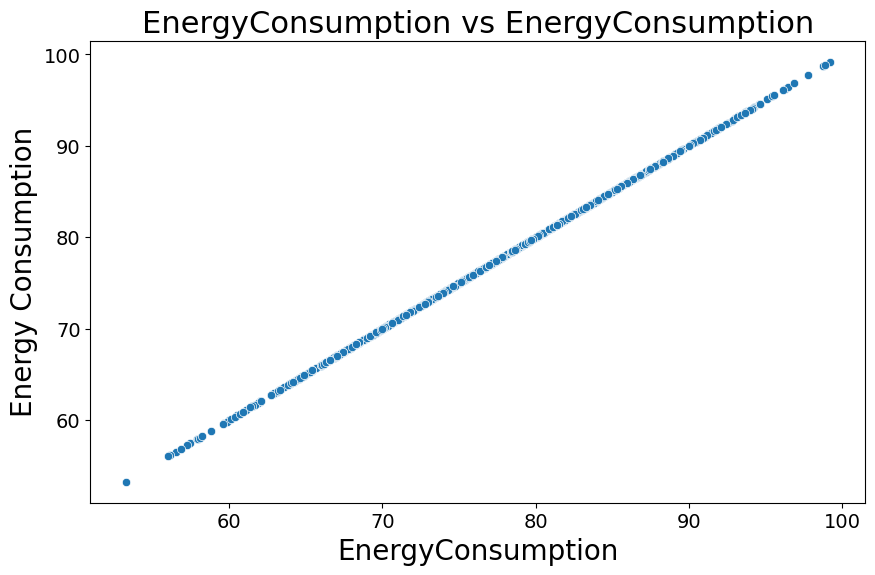

In [29]:
import seaborn as sns
def continious_feature_ploting(dataframe, continuous_columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dataframe[continuous_columns],y='EnergyConsumption', data=df)
    #sns.violinplot(x=dataframe[col_name], y='EnergyConsumption', data=df)
    #plt.xlabel(col_name)
    #plt.ylabel('Energy Consumption')
        # Set plot title and labels with custom font sizes
    plt.title(f'EnergyConsumption vs {col_name}', fontsize=22)
    plt.xlabel(col_name, fontsize=20)
    plt.ylabel('Energy Consumption', fontsize=20)
        # Rotate x-axis labels to avoid overlap and make them more readable
    plt.xticks( fontsize=14)
    # Adjust y-axis font size
    plt.yticks(fontsize=14)
    plt.savefig(f'EnergyConsumption_vs_{col_name}.png', dpi=300, bbox_inches='tight')
    plt.show(block=True)
   
for col_name in continuous_columns:
    continious_feature_ploting(df,col_name)

0     2022-01-01 00:00:00
1     2022-01-01 01:00:00
2     2022-01-01 02:00:00
3     2022-01-01 03:00:00
4     2022-01-01 04:00:00
              ...        
995   2022-02-11 11:00:00
996   2022-02-11 12:00:00
997   2022-02-11 13:00:00
998   2022-02-11 14:00:00
999   2022-02-11 15:00:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]
datetime64[ns]
Timestamp
2022-01-02     3709.498716
2022-01-09    12763.717650
2022-01-16    13090.063488
2022-01-23    12917.157673
2022-01-30    12914.762611
2022-02-06    13018.966955
2022-02-13     8641.705776
Freq: W-SUN, Name: EnergyConsumption, dtype: float64


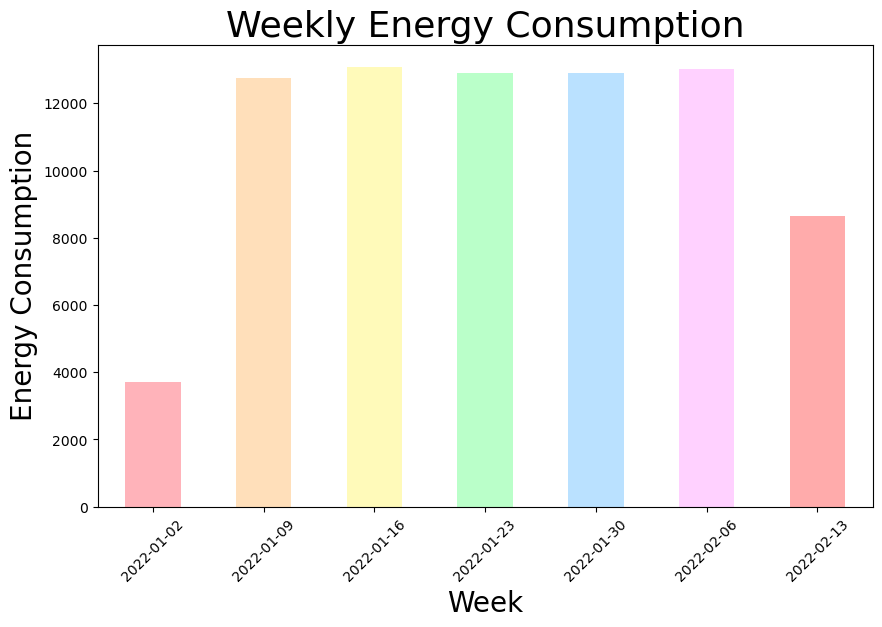

In [184]:
# Resample the energy consumption data weekly and sum for each week
import matplotlib.dates as mdates
print(df['Timestamp'])
# Set the 'Date' column as the index
df.set_index('Timestamp', inplace=True)
print(df.index.dtype)
weekly_energy = df['EnergyConsumption'].resample('W').sum()
print(weekly_energy)
#Plot the data
plt.figure(figsize=(10, 6))
colors = ['#FFB3BA', '#FFDFBA', '#FFFABA', '#BAFFC9', '#BAE1FF', '#FFD1FF', '#FFABAB']
weekly_energy.plot(kind='bar',color=colors, legend=False)
plt.title('Weekly Energy Consumption', fontsize=26)
plt.xlabel('Week', fontsize=20)
# Format x-axis labels to show only the date part (YYYY-MM-DD)
#plt.gca().xaxis.set_major_locator(mdates.DayLocator()) 
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Rotate x-axis labels to make them more readable
#plt.xticks(rotation=45)
#print(plt.gca().get_xticks())
x_ticks = weekly_energy.index.strftime('%Y-%m-%d')  # Convert dates to desired format
plt.xticks(ticks=range(len(weekly_energy)), labels=x_ticks, rotation=45)
plt.ylabel('Energy Consumption', fontsize=20)
plt.savefig('Weekly Energy Consumption.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

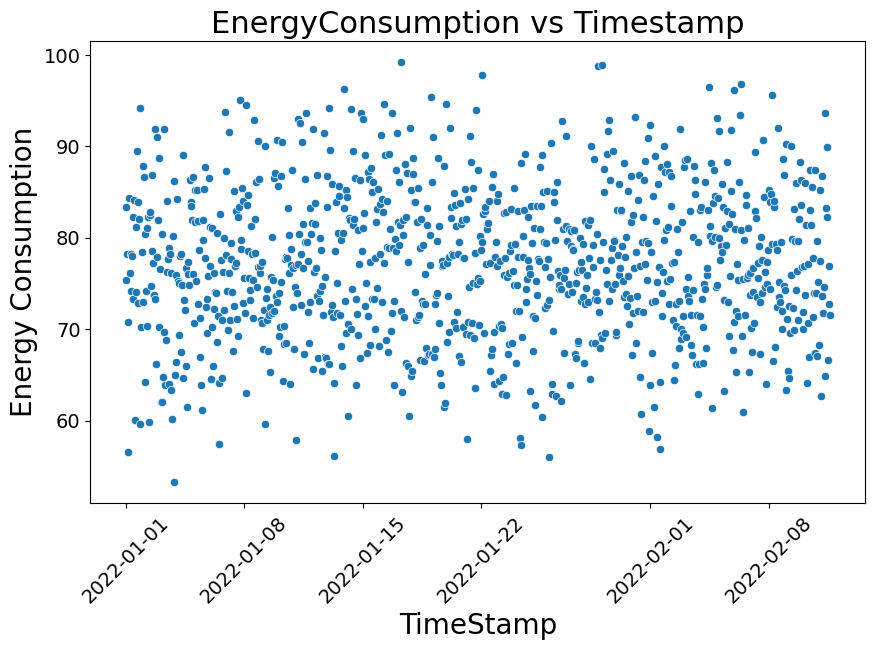

In [218]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Timestamp'],y='EnergyConsumption', data=df)
    #sns.violinplot(x=dataframe[col_name], y='EnergyConsumption', data=df)
    #plt.xlabel(col_name)
    #plt.ylabel('Energy Consumption')
        # Set plot title and labels with custom font sizes
plt.title('EnergyConsumption vs Timestamp', fontsize=22)
plt.xlabel('TimeStamp', fontsize=20)
plt.ylabel('Energy Consumption', fontsize=20)
        # Rotate x-axis labels to avoid overlap and make them more readable
plt.xticks( fontsize=14, rotation =45)
    # Adjust y-axis font size
plt.yticks(fontsize=14)
plt.savefig('EnergyConsumption_vs_Timestamp.png', dpi=300, bbox_inches='tight')
plt.show(block=True)

In [30]:
#Plotting of Categorical variable
category_col= [col for col in df.columns if df[col].nunique() <= 10]
print(category_col)

['Occupancy', 'HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']


In [31]:
def col_summary(dataframe, col_name):
    sns.barplot(x=dataframe[col_name],y='EnergyConsumption', data=df, hue=dataframe[col_name] ,palette='pastel',errorbar=('ci', 95), capsize=0)
    plt.title(f'EnergyConsumption vs {col_name}', fontsize=22)
    plt.xlabel(col_name, fontsize=20)
    plt.ylabel('Energy Consumption', fontsize=20)
    plt.savefig(f'EnergyConsumption_vs_{col_name}.png', dpi=300, bbox_inches='tight')
    plt.show(block=True)

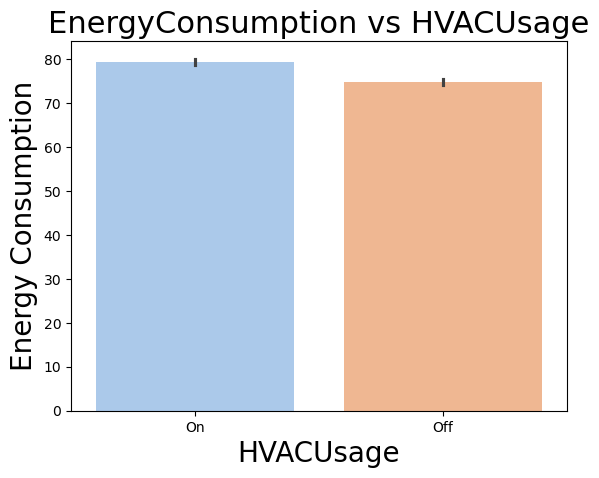

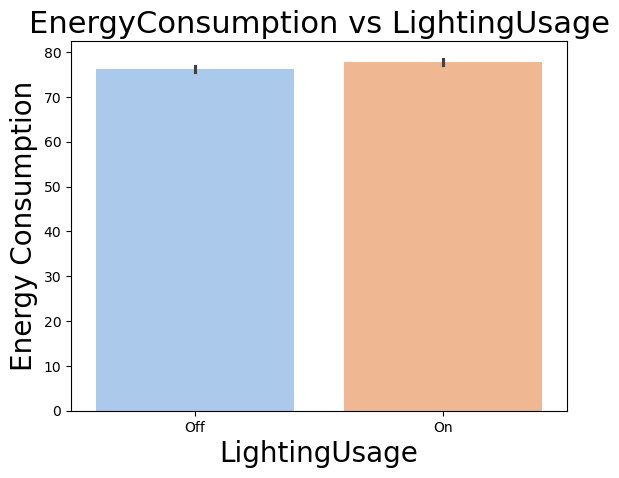

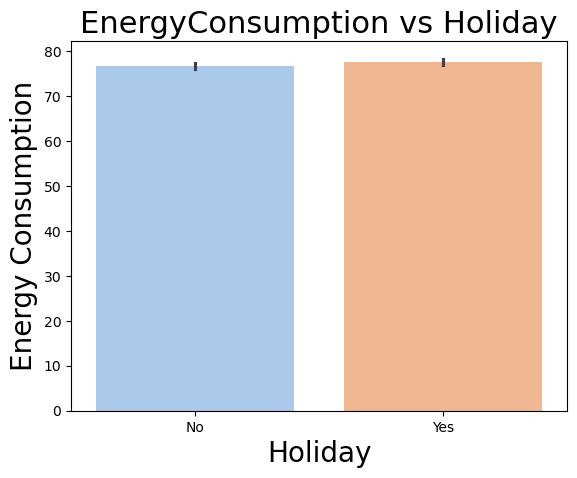

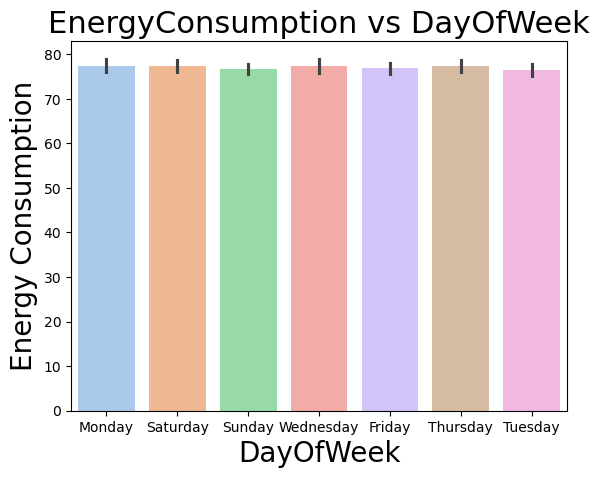

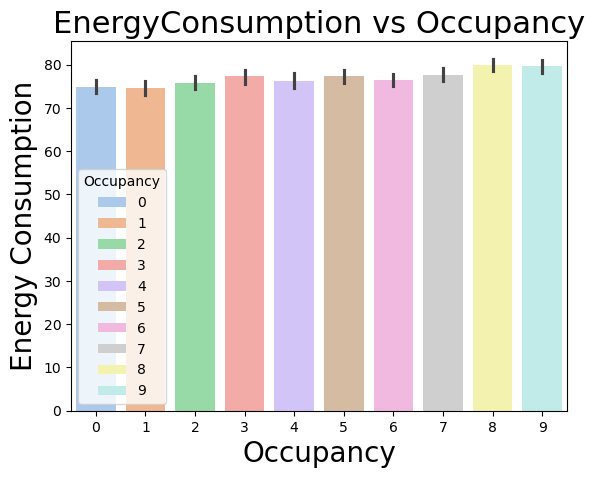

In [32]:
col_summary(df,'HVACUsage')
col_summary(df,'LightingUsage')
col_summary(df,'Holiday')
col_summary(df,'DayOfWeek')
col_summary(df,'Occupancy')

77055.87286871001

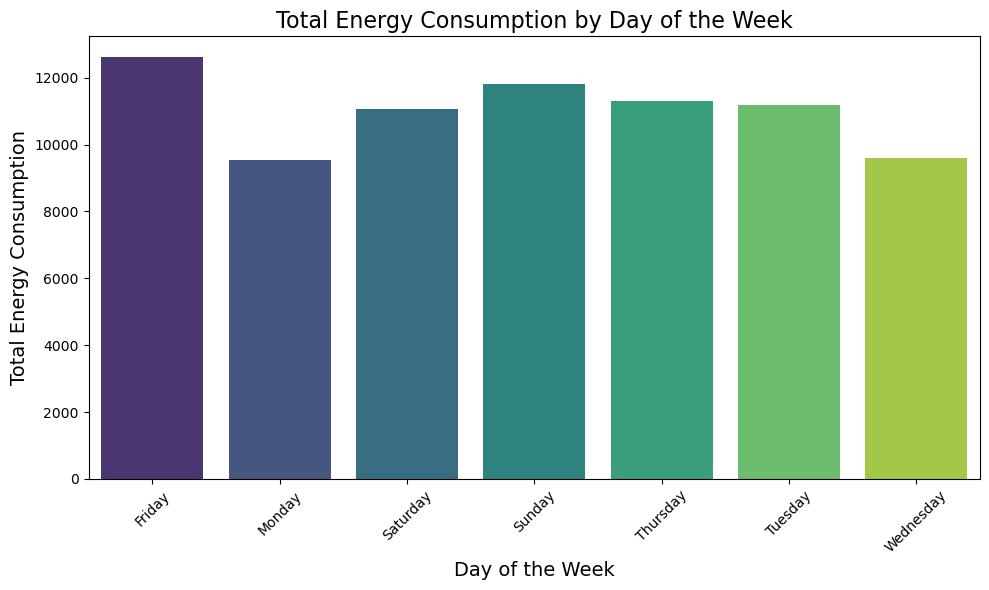

In [252]:
# Group by day of the week and sum energy consumption
df = pd.read_csv('Energy_consumption.csv')
display(df['EnergyConsumption'].sum())
df['EnergyConsumption'] = pd.to_numeric(df['EnergyConsumption'], errors='coerce')
daily_energy_consumption = df.groupby('DayOfWeek', as_index=False)['EnergyConsumption'].sum()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='EnergyConsumption', data=daily_energy_consumption, hue='DayOfWeek', palette='viridis')
plt.title('Total Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Energy Consumption', fontsize=14)
# Force the y-axis to show values without scientific notation or scaling
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

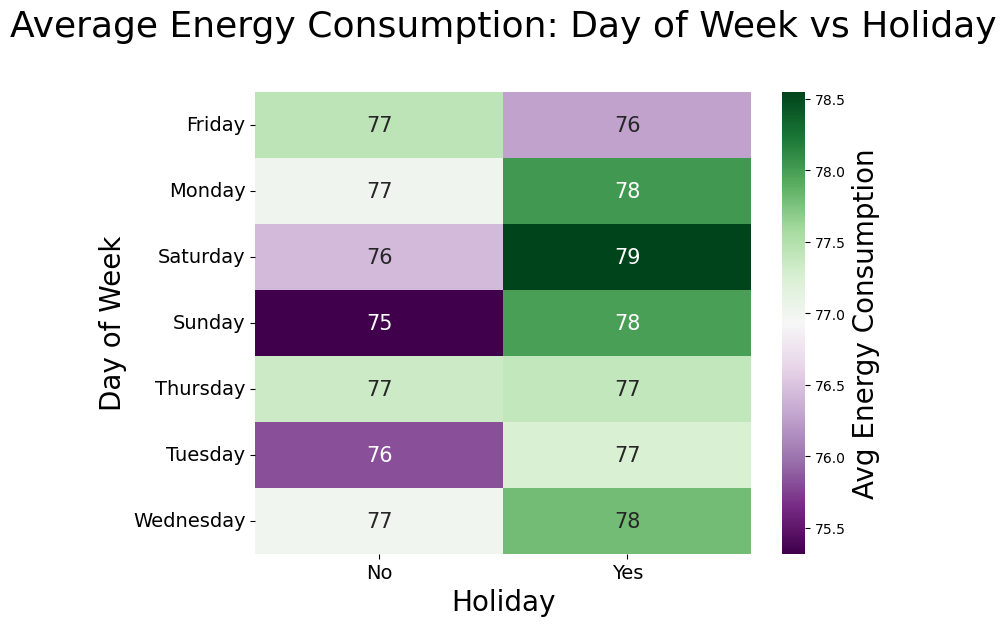

In [295]:
# Create a pivot table of Energy Consumption by Day of Week and Holiday
import numpy as np
pivot_table = df.pivot_table(values='EnergyConsumption', index='DayOfWeek', columns='Holiday', aggfunc='mean')

# Create a heatmap for categorical data
plt.figure(figsize=(8, 6))
#sns.heatmap(pivot_table, annot=True, cmap='PRGn',
#          cbar_kws={'label': 'Avg Energy Consumption'})
ax = sns.heatmap(pivot_table, annot=True, cmap='PRGn', cbar_kws={'label': 'Avg Energy Consumption'}, annot_kws={'size': 15}) 
# Increasing the colorbar label font size 
cbar = ax.collections[0].colorbar 
cbar.ax.yaxis.label.set_size(20)
plt.title('Average Energy Consumption: Day of Week vs Holiday' , fontsize=26 , pad=40)
plt.xlabel('Holiday', fontsize=20)
plt.ylabel('Day of Week', fontsize=20)
# Optionally, further customize tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Average Energy Consumption_ Day of Week vs Holiday.png', dpi=300, bbox_inches='tight')
plt.show()


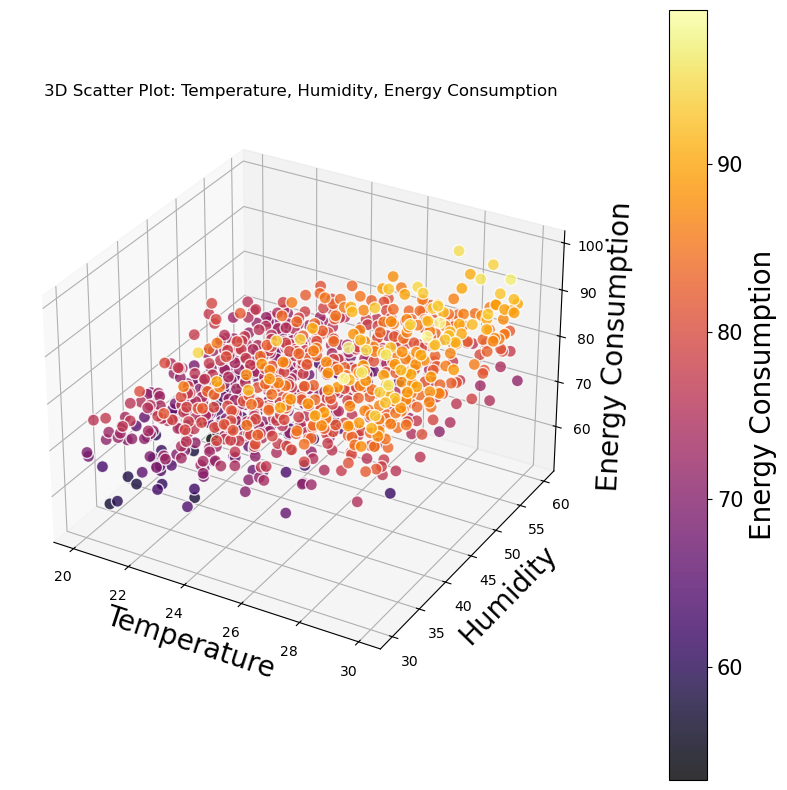

In [313]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3 variables
scatter= ax.scatter(df['Temperature'], df['Humidity'], df['EnergyConsumption'], c=df['EnergyConsumption'],  
                      cmap='inferno',
                      s=75, alpha=0.8, edgecolors='w')
# Adding a color bar
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Energy Consumption')
cbar.ax.yaxis.label.set_size(20)
cbar.ax.tick_params(labelsize=15)
ax.set_xlabel('Temperature', fontsize=20)
ax.set_ylabel('Humidity', fontsize=20)
ax.set_zlabel('Energy Consumption', fontsize=20)
plt.savefig('3D Scatter Plot_Temperature, Humidity, Energy Consumption.png', dpi=300, bbox_inches='tight')
plt.title('3D Scatter Plot: Temperature, Humidity, Energy Consumption')
plt.show()

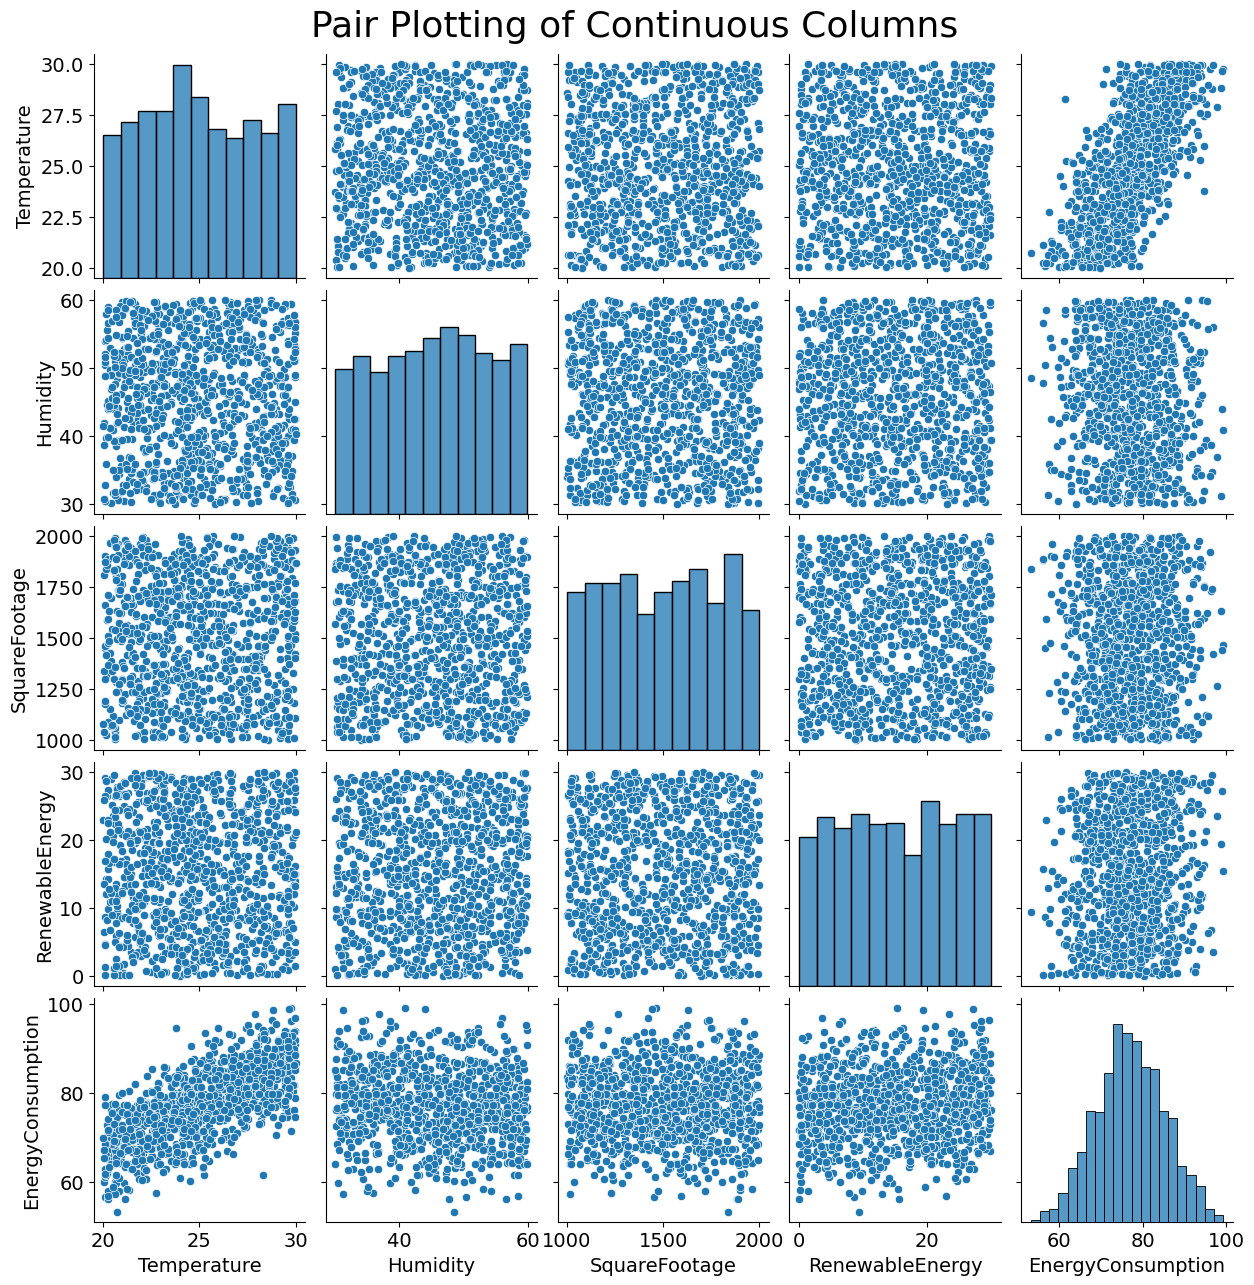

In [34]:
# Pairplot
g=sns.pairplot(df[continuous_columns])
plt.suptitle('Pair Plotting of Continuous Columns', fontsize=26, y=1.02)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14) 
    ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('Pairplot of continous columns.png', dpi=300, bbox_inches='tight')
plt.show()

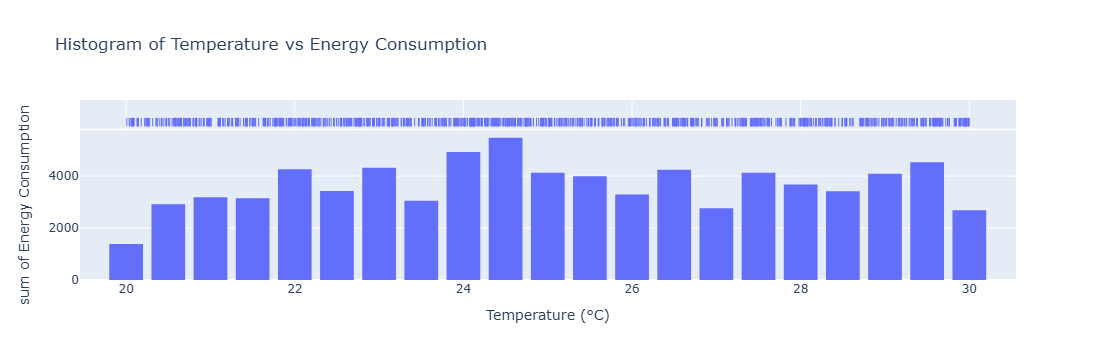

In [30]:
import plotly.express as px
# Create a histogram plot to visualize the relationship between Temperature and EnergyConsumption
fig = px.histogram(df, x="Temperature", y="EnergyConsumption", marginal="rug",
                   hover_data=df.columns,
                   title='Histogram of Temperature vs Energy Consumption',
                   labels={'Temperature': 'Temperature (°C)', 'EnergyConsumption': 'Energy Consumption'})
fig.update_layout(bargap=0.2)  # Gap between bars

# Show plot
fig.show()

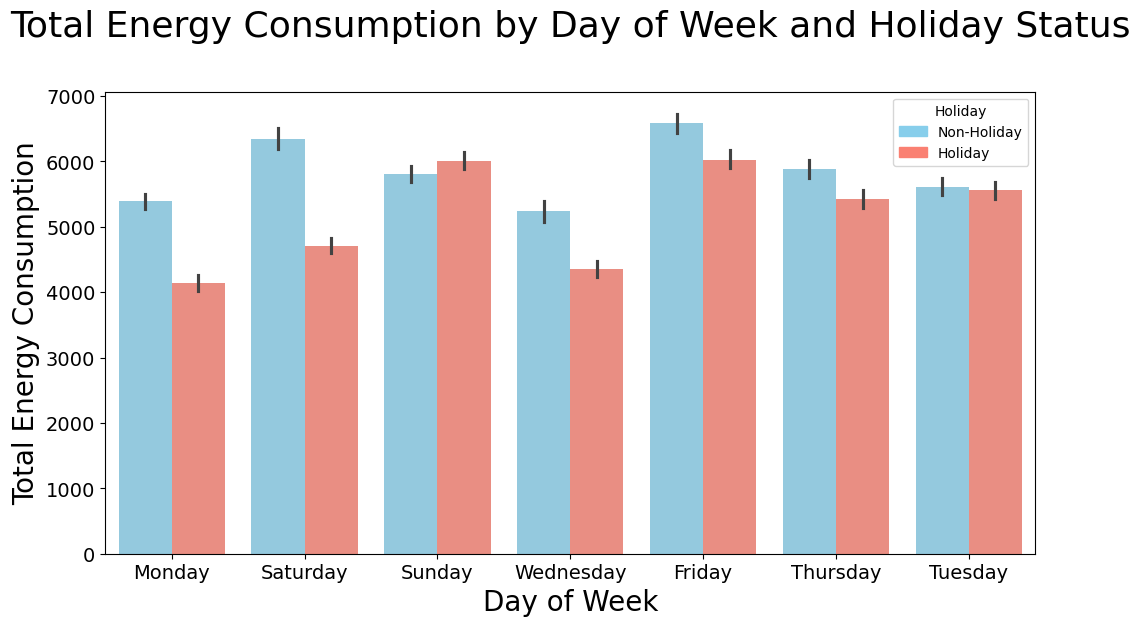

In [256]:
df = pd.read_csv('Energy_consumption.csv')
from matplotlib.patches import Patch
plt.figure(figsize=(12, 6))
#df['Holiday'] = df['Holiday'].astype(str)
#print(df['Holiday'] )
# Custom color palette for 'No' and 'Yes'
Palette = {'No': 'skyblue', 'Yes': 'salmon'}
sns.barplot(x='DayOfWeek', y='EnergyConsumption', hue='Holiday', data=df, estimator=sum, palette=Palette)
plt.title('Total Energy Consumption by Day of Week and Holiday Status', fontsize=26, pad=40)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Total Energy Consumption', fontsize=20)
# Optionally, further customize tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(title='Holiday', labels=['No', 'Yes'])
# Customize the legend with custom colors
legend_labels = ['Non-Holiday', 'Holiday']
legend_colors = ['skyblue', 'salmon']
handles = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Holiday', loc='upper right')
plt.savefig('Total Energy Consumption by Day of Week and Holiday Status.png', dpi=300, bbox_inches='tight')
plt.show()

In [239]:
# Check for NaN or NULL values
nan_check = df.isnull().sum()
print(nan_check)

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64
